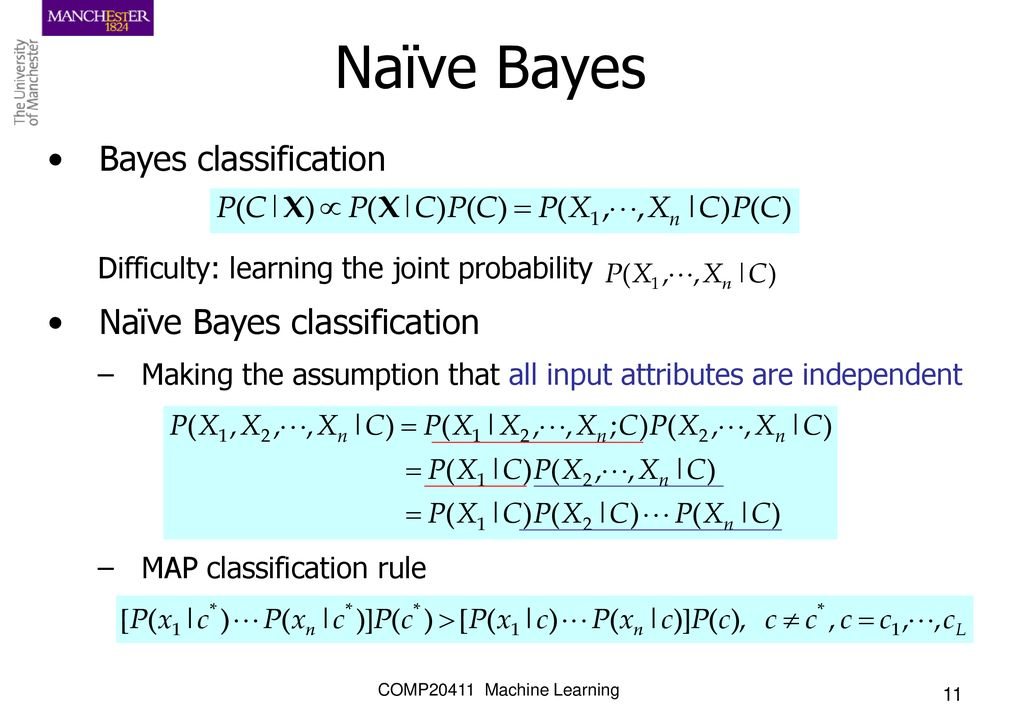
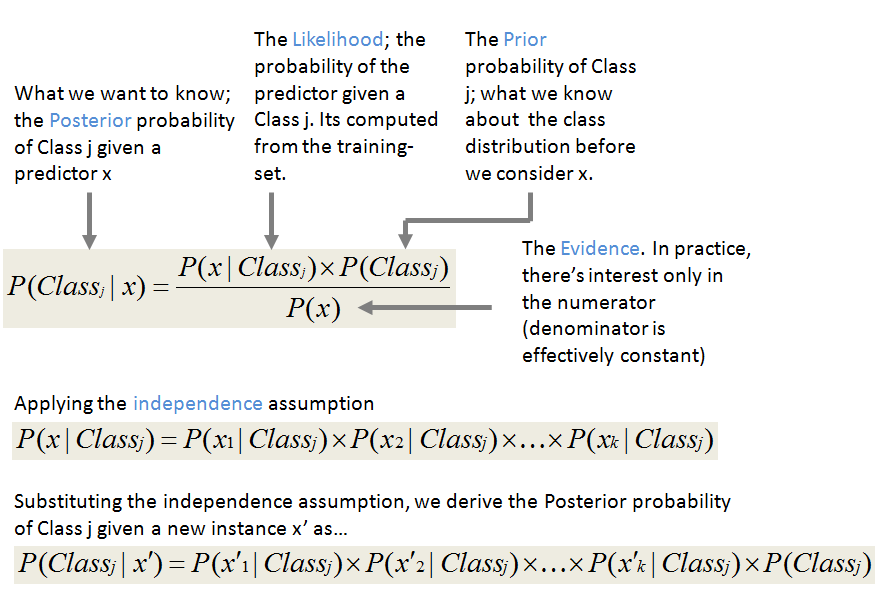

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm, accuracy_score as ac, classification_report as report,\
roc_curve, roc_auc_score , recall_score , precision_score, f1_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Gaussian Naive Bayes

### IRIS dataset

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='species', ylabel='petal_length'>

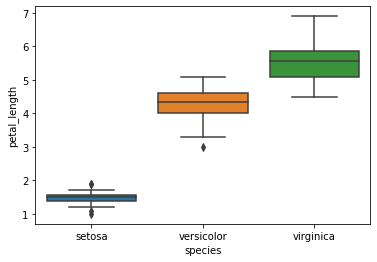

In [4]:
sns.boxplot(iris.species, iris.petal_length)

<AxesSubplot:xlabel='species', ylabel='petal_width'>

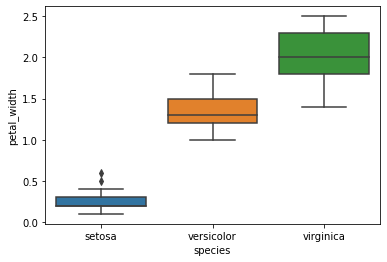

In [5]:
sns.boxplot(iris.species, iris.petal_width)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

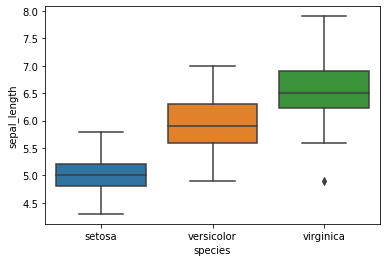

In [6]:
sns.boxplot(iris.species, iris.sepal_length)

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

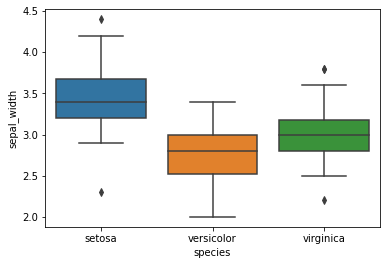

In [7]:
sns.boxplot(iris.species, iris.sepal_width)

<AxesSubplot:xlabel='petal_width', ylabel='Density'>

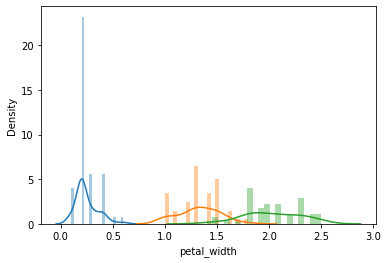

In [13]:
sns.distplot(iris[iris.species=='setosa'].iloc[:,3],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=='versicolor'].iloc[:,3],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=='virginica'].iloc[:,3],norm_hist=True,bins=20)

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

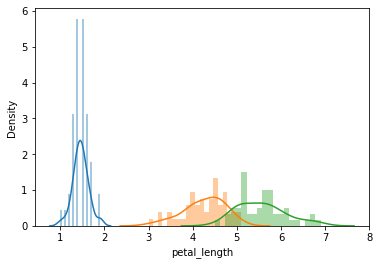

In [15]:
sns.distplot(iris[iris.species=='setosa'].iloc[:,2],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=='versicolor'].iloc[:,2],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=='virginica'].iloc[:,2],norm_hist=True,bins=20)

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

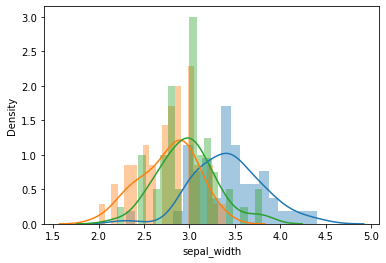

In [16]:
sns.distplot(iris[iris.species=='setosa'].iloc[:,1],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=='versicolor'].iloc[:,1],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=='virginica'].iloc[:,1],norm_hist=True,bins=20)

<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

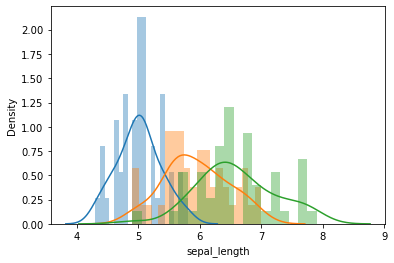

In [17]:
sns.distplot(iris[iris.species=='setosa'].iloc[:,0],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=='versicolor'].iloc[:,0],norm_hist=True,bins=20)
sns.distplot(iris[iris.species=='virginica'].iloc[:,0],norm_hist=True,bins=20)

In [21]:
iris.iloc[:,3]

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

In [38]:
x = iris.iloc[:,3]
y = iris.iloc[:,4]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=0)

In [40]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

In [41]:
model = GaussianNB()
model= model.fit(x_train, y_train)

In [42]:
pred = model.predict(x_test)

In [43]:
metrics.accuracy_score(y_test, pred)

0.9555555555555556

In [35]:
pd.crosstab(y_test, pred)

col_0,setosa,versicolor,virginica
species,,,
setosa,15,1,0
versicolor,0,18,0
virginica,0,1,10


#### Check for overfitting and underfitting 


In [44]:
# print the scores on training and test set

print('Training set score: {:.2f}%'.format(model.score(x_train, y_train)*100))

print('Test set score: {:.2f}%'.format(model.score(x_test, y_test)*100))

Training set score: 95.24%
Test set score: 95.56%


In [50]:
# print the classification report
print(cm(y_test, pred))
print(report(y_test, pred))

[[15  1  0]
 [ 0 18  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      0.94      0.97        16
  versicolor       0.90      1.00      0.95        18
   virginica       1.00      0.91      0.95        11

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45



In [52]:
iris.drop("species",axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Gaussian Naive Bayes:
When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

![Filter Method](https://miro.medium.com/max/844/1*AYsUOvPkgxe3j1tEj2lQbg.gif)
Gaussian Distribution(Normal Distribution)
Since the way the values are present in the dataset changes, the formula for conditional probability changes to,
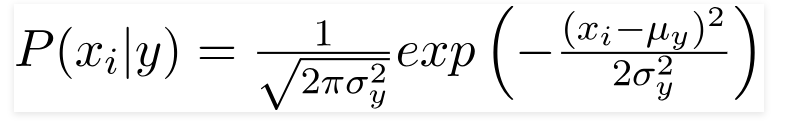

Now, you can obtain the values for each by looking at the dataset and substitute them into the equation. For all entries in the dataset, the denominator does not change, it remain static. Therefore, the denominator can be removed and a proportionality can be introduced.

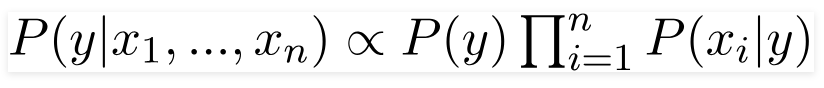

In our case, the class variable(y) has only two outcomes, yes or no. There could be cases where the classification could be multivariate. Therefore, we need to find the class y with maximum probability.

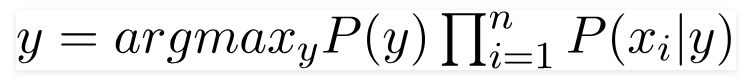

Using the above function, we can obtain the class, given the predictors.

In [53]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop("species",axis=1), iris.species, test_size=0.3,random_state=0)
mu1=np.mean(x_train[y_train=='setosa'].petal_length)
sigma1=np.var(x_train[y_train=='setosa'].petal_length)

mu2=np.mean(x_train[y_train=='versicolor'].petal_length)
sigma2=np.var(x_train[y_train=='versicolor'].petal_length)

mu3=np.mean(x_train[y_train=='virginica'].petal_length)
sigma3=np.var(x_train[y_train=='virginica'].petal_length)

def dis(mu,x,sigma):
    return (np.exp(-(x-mu)**2)/(2**sigma))/(np.sqrt(sigma))

x_test['prob_class_1']=x_test['petal_length'].apply(lambda x: dis(mu1,x,sigma1))
x_test['prob_class_2']=x_test['petal_length'].apply(lambda x: dis(mu2,x,sigma2))
x_test['prob_class_3']=x_test['petal_length'].apply(lambda x: dis(mu3,x,sigma3))
l=['setosa','versicolor','virginica']
x_test['pred']=np.argmax(x_test[['prob_class_1','prob_class_2','prob_class_3']].values,axis=1)
x_test["pred"]=x_test['pred'].apply(lambda x: l[x])
x_test['true']=y_test

In [54]:
x_test

,sepal_length,sepal_width,petal_length,petal_width,prob_class_1,prob_class_2,prob_class_3,pred,true
114,5.8,2.8,5.1,2.4,1.162406e-05,0.777429,1.120608e+00,virginica,virginica
62,6.0,2.2,4.0,1.0,1.057879e-02,1.690648,1.118622e-01,versicolor,versicolor
33,5.5,4.2,1.4,0.2,6.929596e+00,0.000704,3.201201e-08,setosa,setosa
107,7.3,2.9,6.3,1.8,4.351306e-10,0.021084,8.760932e-01,virginica,virginica
7,5.0,3.4,1.5,0.2,6.933674e+00,0.001220,7.337612e-08,setosa,setosa
100,6.3,3.3,6.0,2.5,7.287250e-09,0.068058,1.220494e+00,virginica,virginica
40,5.0,3.5,1.3,0.3,6.788387e+00,0.000398,1.368943e-08,setosa,setosa
86,6.7,3.1,4.7,1.5,1.832266e-04,1.364430,6.414156e-01,versicolor,versicolor
76,6.8,2.8,4.8,1.4,9.475666e-05,1.221539,7.598833e-01,versicolor,versicolor
71,6.1,2.8,4.0,1.3,1.057879e-02,1.690648,1.118622e-01,versicolor,versicolor
